In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the dataset
train_data_path = r"D:\Internships\Prodigy Infotech\HOUSE_PRICE_PREDICTION\dataset\train.csv"
train_df = pd.read_csv(train_data_path)


In [40]:
# Display the first few rows of the dataframe to understand its structure
print(train_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [41]:
# Select relevant features for the model
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
X = train_df[features]
y = train_df['SalePrice']

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict house prices on the test set
y_pred = model.predict(X_test)


In [44]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2810942965.2180653
R-squared: 0.6335301929422245


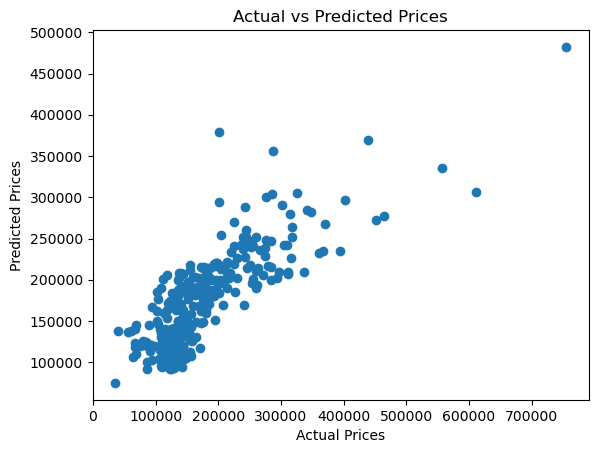

In [46]:
# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [49]:
# Display the model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

               Coefficient
GrLivArea       101.732566
BedroomAbvGr -26704.014676
FullBath      30848.028471
HalfBath       4611.653264


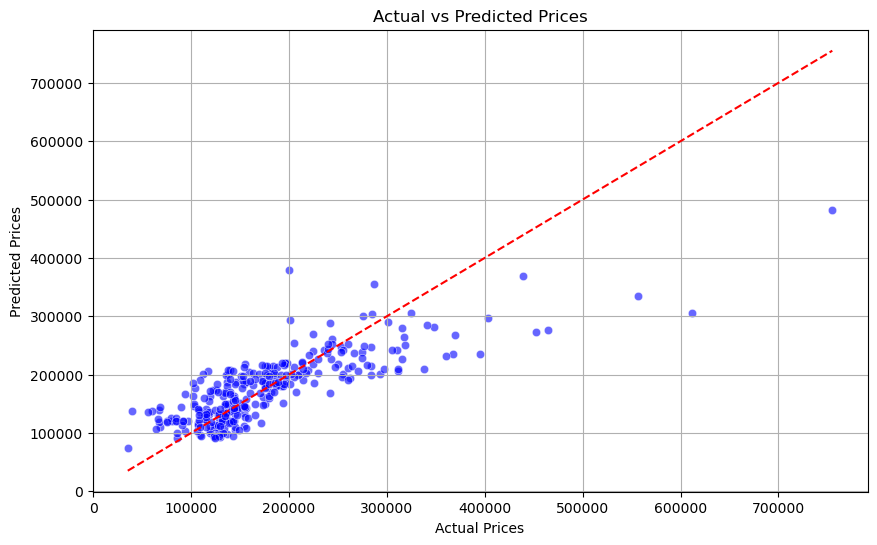

In [50]:
# Enhanced plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

In [51]:
# Display the model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

               Coefficient
GrLivArea       101.732566
BedroomAbvGr -26704.014676
FullBath      30848.028471
HalfBath       4611.653264


ADDITIONAL PLOTS

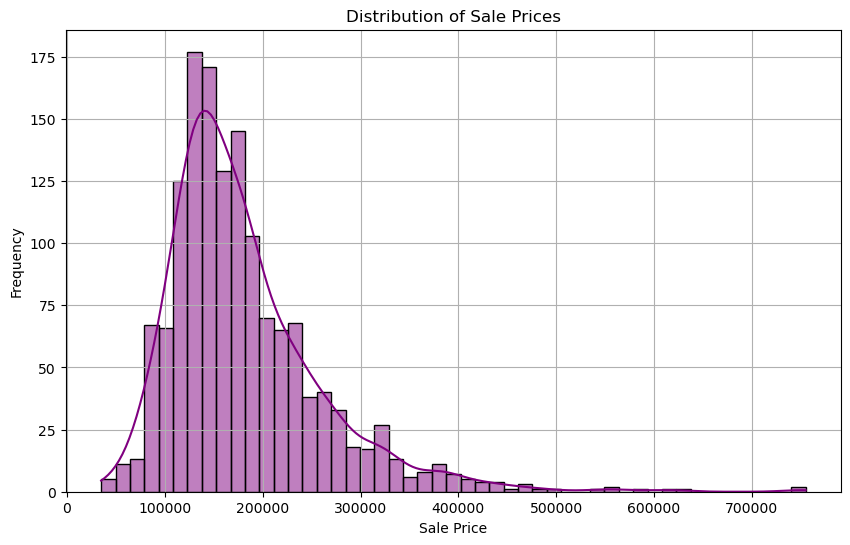

In [52]:
# Plot distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, color='purple')
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

c:\Users\conta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


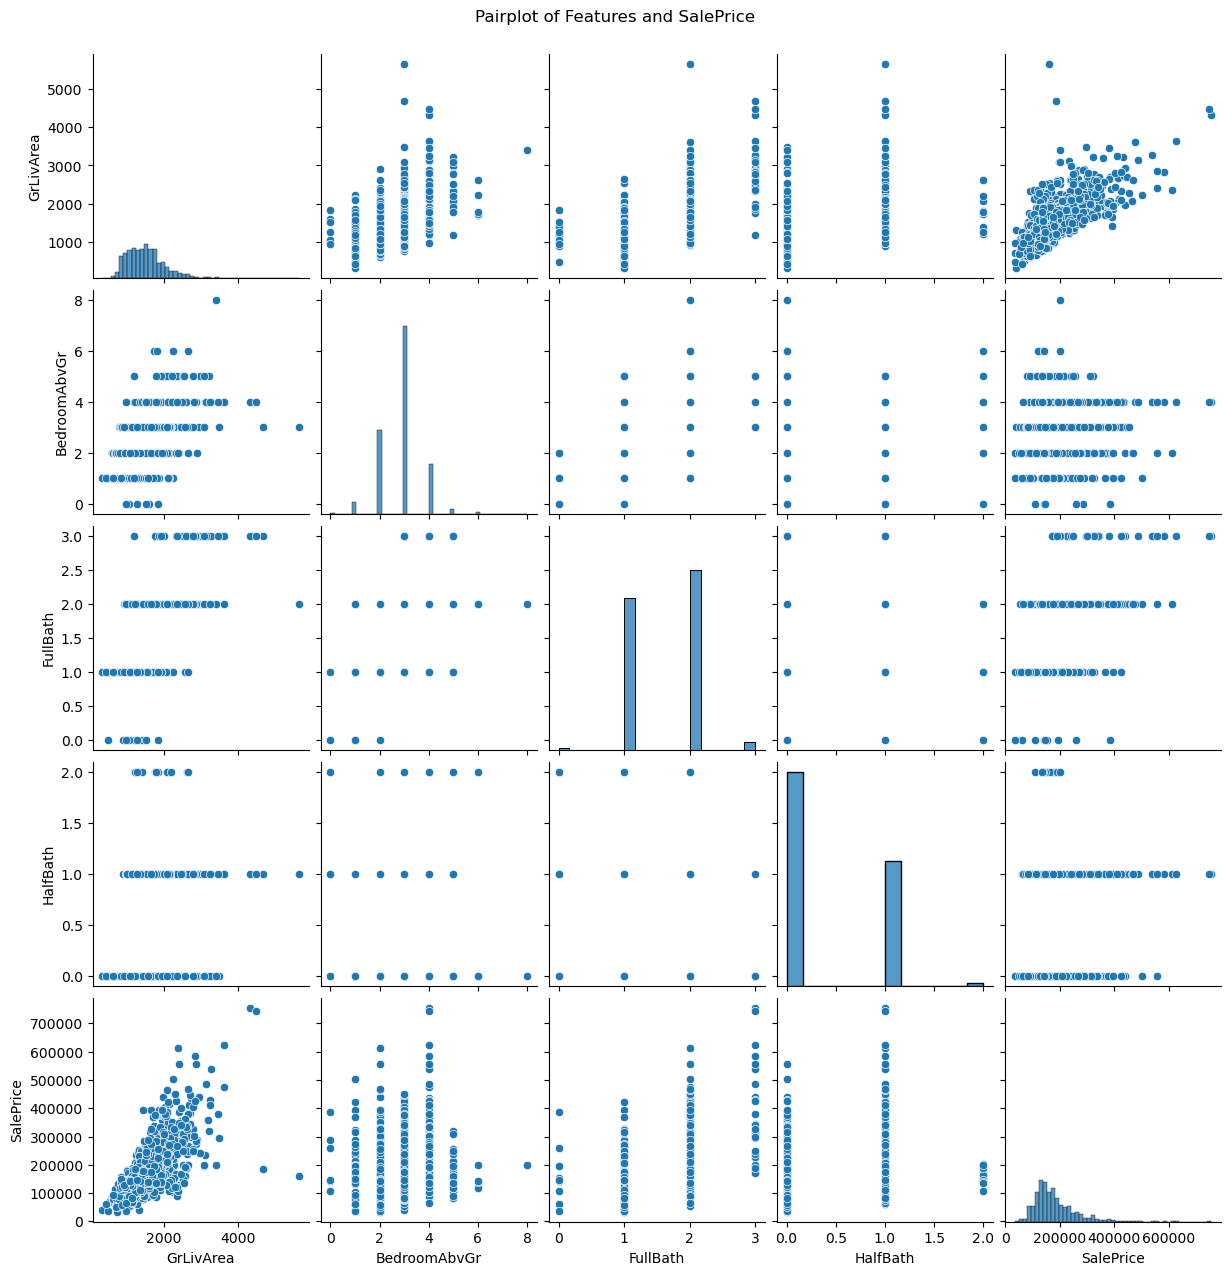

In [53]:
# Plotting pairplot of features
sns.pairplot(train_df[features + ['SalePrice']])
plt.suptitle("Pairplot of Features and SalePrice", y=1.02)
plt.show()

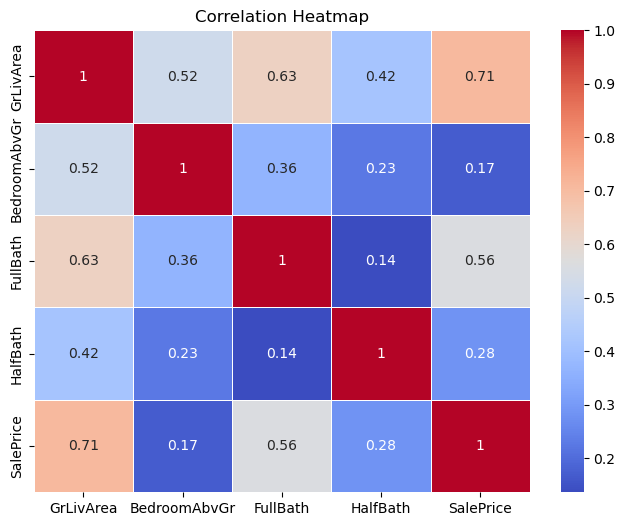

In [54]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = train_df[features + ['SalePrice']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()